In [5]:
%matplotlib inline
%pylab inline
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import palettable as pal
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


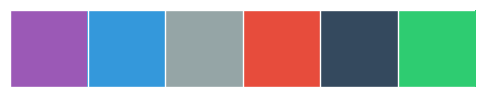

In [14]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))

# Comparative Transrate metrics

* Proportion of references with a CRB-BLAST hit 
* Reciprocal best hits where the top match in one direction is the same as the top match in the other direction. 
* Selects all alignments with e-values below the cutoff for each length as high-confidence predicted homologs
* Metrics: http://hibberdlab.com/transrate/metrics.html

### Linking MMETSP and SRR number 
- Enables cross comparison of the NCGR to Trinity assemblies

In [12]:
sra_run = pd.read_csv('../SraRunInfo_719.csv')
sra_map = sra_run[['Run', 'SampleName']]


In [13]:
# reference-based transrate evaluation
file_combined_v_SRA = "../assembly_evaluation_data/combined_transrate_reference.csv"
file_SRA_v_combined = "../assembly_evaluation_data/combined_transrate_reverse.csv"
file_combined_v_ncgr = "../assembly_evaluation_data/ncgr_combined_transrate_reference.csv"
file_ncgr_v_combined = "../assembly_evaluation_data/ncgr_combined_transrate_reverse.csv"

In [14]:
# Load in df and add the mmetsp/sra information
combined_v_SRA = pd.read_csv(file_combined_v_SRA,index_col="Run")
SRA_v_combined = pd.read_csv(file_SRA_v_combined,index_col="Run")
combined_v_ncgr = pd.read_csv(file_combined_v_ncgr,index_col="Run")
ncgr_v_combined = pd.read_csv(file_ncgr_v_combined,index_col="Run")

In [15]:
SRA_v_combined = SRA_v_combined.drop_duplicates()
combined_v_SRA = combined_v_SRA.drop_duplicates()
combined_v_ncgr = combined_v_ncgr.drop_duplicates()
ncgr_v_combined = ncgr_v_combined.drop_duplicates()

### Plotting functions 


In [41]:
def scatter_diff(df1, df2, column, fig, ax, df1name = 'df1', df2name = 'df2', 
                 color1='#566573', color2='#2ecc71', ymin=0, ymax=1, ypos=.95):
    # plot scatter differences between two dfs with the same columns
    # create new df for data comparison
    newdf = pd.DataFrame()
    newdf[df1name] = df1[column]
    newdf[df2name] = df2[column]
    newdf = newdf.dropna()
    newdf = newdf.drop_duplicates()
    # plot with different colors if df1 > or < than df2
    newdf.loc[newdf[df1name] > newdf[df2name], [df1name, df2name]].T.plot(ax=ax, legend = False, 
                                                                          color = color1, lw=2)
    newdf.loc[newdf[df1name] <= newdf[df2name], [df1name, df2name]].T.plot(ax=ax, legend = False, 
                                                                           color = color2, alpha = 0.5, lw=2)
    ax.text(-.1, ypos, str(len(newdf.loc[newdf[df1name] > newdf[df2name]])), 
            color= color1, fontsize='x-large', fontweight='heavy')
    ax.text(.95, ypos, str(len(newdf.loc[newdf[df1name] <= newdf[df2name]])), 
            color= color2, fontsize='x-large', fontweight='heavy')

    # aesthetics 
    ax.set_xlim(-.15, 1.15)
    ax.set_ylim(ymin, ymax)
    ax.set_xticks([0,1])
    ax.set_xticklabels([df1name, df2name], fontsize='large', fontweight='bold')
#     ax.set_ylabel(column, fontsize='x-large')
    return newdf, fig, ax
    

def violin_split(df, col1, col2, fig, ax, color2='#566573', color1='#F5B041', ymin=0, ymax=1):
    #create split violin plots
    v1 = ax.violinplot(df[col1],
                   showmeans=False, showextrema=False, showmedians=False)
    for b in v1['bodies']:
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
        b.set_color(color2)
        b.set_alpha(0.85)
    v2 = ax.violinplot(df[col2],
                   showmeans=False, showextrema=False, showmedians=False)
    for b in v2['bodies']:
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, np.inf)
        b.set_color(color1)
        b.set_alpha(0.85)
    ax.set_xticks([])
    ax.set_ylim([ymin, ymax])
    
def create_plots(df1, df2, column, col_title, df1name = 'NCGR', df2name = 'DIB_combined', ymax = 1, ymin = 0, ypos = 0.95):
    fig, axs = plt.subplots(1,2)
    fig.set_size_inches(6,6)
    outdf, fig, ax = scatter_diff(df1, df2, column = column, 
                 fig = fig, ax = axs[0], df1name = df1name, df2name = df2name, 
                                  ymax = ymax, ymin = ymin, ypos = ypos)
    violin_split(outdf, df1name, df2name, fig, axs[1], ymin = ymin, ymax = ymax)
    fig.suptitle(col_title, fontsize = 'x-large', fontweight = 'bold')
    return outdf, fig, ax

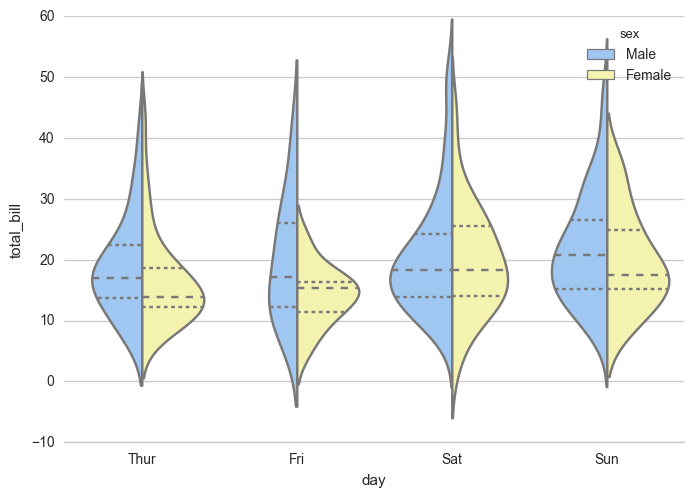

In [9]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Load the example tips dataset
tips = sns.load_dataset("tips")
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="day", y="n_seqs", hue="", data=tips, split=True,
               inner="quart", palette={"Male": "b", "Female": "y"})
sns.despine(left=True)

In [16]:
SRA_v_combined.head()

,assembly,n_seqs,smallest,largest,n_bases,mean_len,n_under_200,n_over_1k,n_over_10k,n_with_orf,...,p_cov75,cov85,p_cov85,cov95,p_cov95,reference_coverage,score,optimal_score,cutoff,SampleName
Run,,,,,,,,,,,,,,,,,,,,,
SRR1294454,/mnt/scratch/ljcohen/mmetsp/MMETSP0717/Chaetoc...,31622,201,6324,23325198,737.62564,0,8078,0,14292,...,0.76839,24081,0.75553,22959,0.72033,0.76829,NaN,NaN,NaN,MMETSP0717
SRR1294455,/mnt/scratch/ljcohen/mmetsp/MMETSP0717/Chaetoc...,13027,201,4914,6847068,525.60590,0,1027,0,4519,...,0.03238,684,0.02146,384,0.01205,0.13538,NaN,NaN,NaN,MMETSP0717
SRR1294456,/mnt/scratch/ljcohen/mmetsp/MMETSP0717/Chaetoc...,13091,201,4823,6877775,525.38194,0,1028,0,4558,...,0.03109,657,0.02061,368,0.01155,0.13541,NaN,NaN,NaN,MMETSP0717
SRR1294457,/mnt/scratch/ljcohen/mmetsp/MMETSP0717/Chaetoc...,13013,201,4849,6830760,524.91816,0,1000,0,4539,...,0.03288,681,0.02137,378,0.01186,0.13683,NaN,NaN,NaN,MMETSP0717
SRR1294445,/mnt/scratch/ljcohen/mmetsp/MMETSP0088/Chaetoc...,28753,201,4099,16978158,590.48301,0,4487,0,10441,...,0.76083,21578,0.74566,20492,0.70813,0.76015,NaN,NaN,NaN,MMETSP0088


In [ ]:
sns.violinplot(x=)

## Comparing combined assemblies vs. individual assemblies

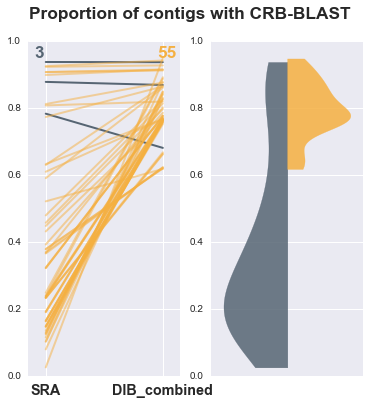

In [40]:
p_refs_with_CRBB, fig, ax = create_plots(SRA_v_combined,combined_v_SRA, 'p_refs_with_CRBB', 'Proportion of contigs with CRB-BLAST')

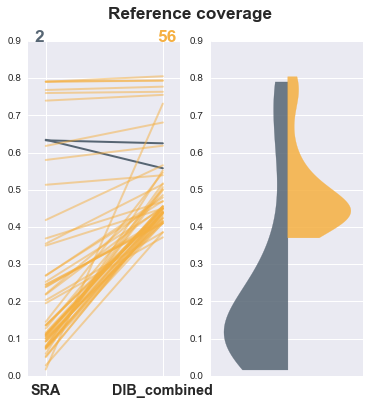

In [33]:
reference_coverage, fig, ax = create_plots(SRA_v_combined, combined_v_SRA, 'reference_coverage', 'Reference coverage'
                                           , ymax = 0.9, ypos = 0.9)

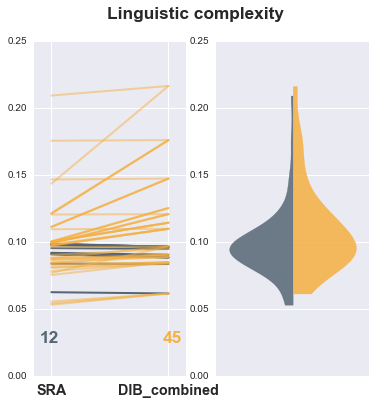

In [34]:
linguistic_complexity, fig, ax = create_plots(SRA_v_combined,combined_v_SRA,  'linguistic_complexity', 'Linguistic complexity', ymax=0.25, ypos=0.025)

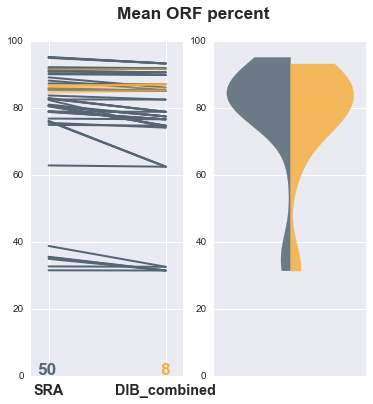

In [35]:
mean_orf_percent, fig, ax = create_plots(SRA_v_combined,combined_v_SRA,  'mean_orf_percent', 'Mean ORF percent',ymax=100, ypos=0.5)

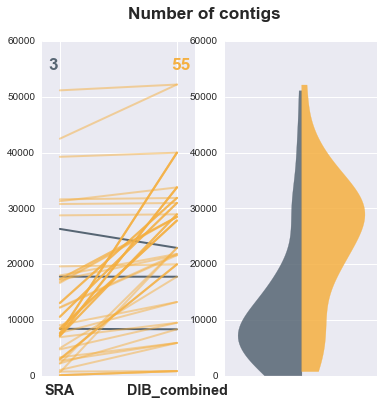

In [36]:
n_seqs, fig, ax = create_plots(SRA_v_combined, combined_v_SRA, 'n_seqs', 'Number of contigs',ymax=60000, ypos=55000)

# Comparing combined assemblies with NCGR

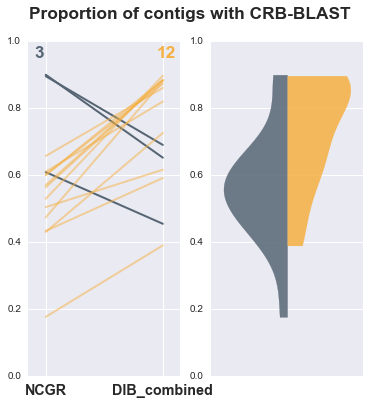

In [42]:
p_refs_with_CRBB, fig, ax = create_plots(ncgr_v_combined, combined_v_ncgr,'p_refs_with_CRBB', 'Proportion of contigs with CRB-BLAST')

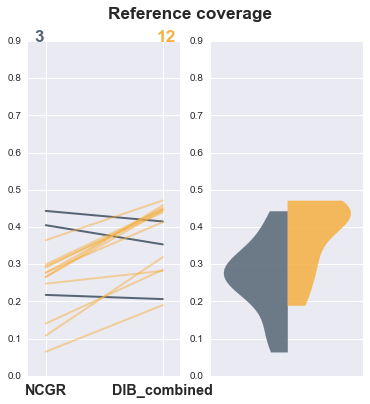

In [43]:
reference_coverage, fig, ax = create_plots(ncgr_v_combined, combined_v_ncgr, 'reference_coverage', 'Reference coverage'
                                           , ymax = 0.9, ypos = 0.9)

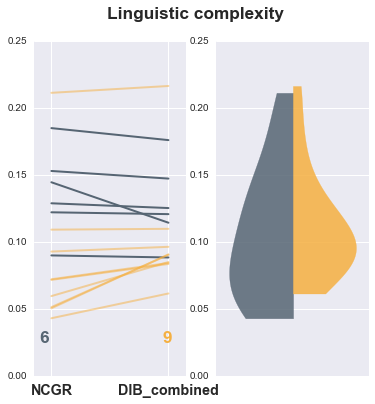

In [44]:
linguistic_complexity, fig, ax = create_plots(ncgr_v_combined, combined_v_ncgr,  'linguistic_complexity', 'Linguistic complexity', ymax=0.25, ypos=0.025)

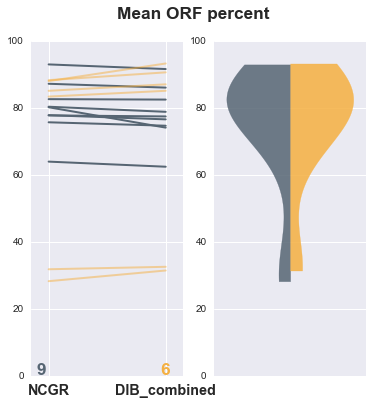

In [45]:
mean_orf_percent, fig, ax = create_plots(ncgr_v_combined, combined_v_ncgr,  'mean_orf_percent', 'Mean ORF percent',ymax=100, ypos=0.5)

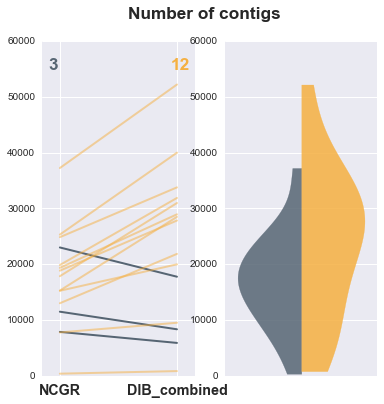

In [46]:
n_seqs, fig, ax = create_plots(ncgr_v_combined, combined_v_ncgr, 'n_seqs', 'Number of contigs',ymax=60000, ypos=55000)